# Machine Learning

## Gradient Boosting Machines 

* Adaptive Boosting (AdaBoost) : Zayıf sınıflandırıcıların bir araya gelerek gçlü bir sınıflandırı oluşturma fikrini ahyata geçiren algoritmadır.
- AdaBoost'un sınıflandıram ve regresyon problemlerine kolayca uyarlanabilen genelleşrilmiş versyonudur.
* Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

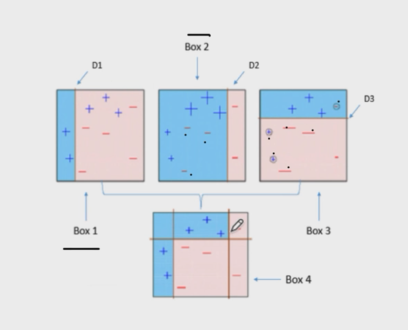

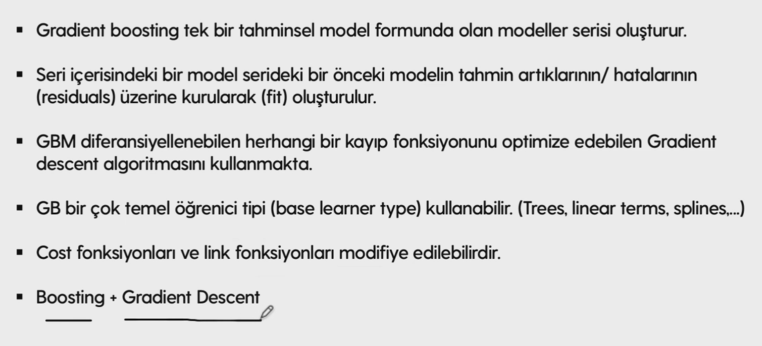

### Model ve Tahmin

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
gbm_model = GradientBoostingRegressor(random_state = 42).fit(X_train, y_train)

In [15]:
y_pred = gbm_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

355.0911760640623

### Model Tuning 

In [17]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [18]:
gbm_params = {"learning_rate" : [0.001, 0.1,0.01],
             "max_depth" : [3,5,8],
             "n_estimators" : [100,200,500],
             "subsample" : [1,0.5,0.8],
             "loss" : ["ls","lad","quantile"]}

# max_features : göz önünde bulundurulacak değişken sayısıdır.
# n_estimators : kullanılacak olan ağaç sayısıdır.

In [19]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [20]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1).fit(X_train, y_train)

In [21]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.8}

In [22]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,loss = "lad", max_depth=3,n_estimators=500,subsample=0.8).fit(X_train, y_train)

In [23]:
y_pred = gbm_tuned.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

321.21634886943343

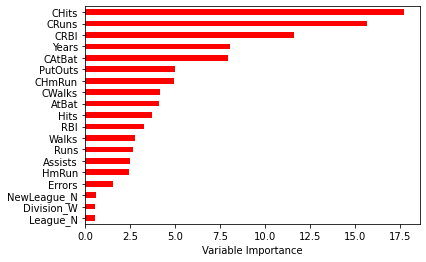

In [26]:
Importance = pd.DataFrame({"Importance" : gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                      axis = 0,
                      ascending = True).plot(kind = "barh",
                                            color = "r")

plt.xlabel("Variable Importance")
plt.gca().legend_ = None